In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Configure visualizations
%matplotlib inline
sns.set(style='whitegrid')

In [3]:
# Define column names as per dataset documentation
column_names = ['Unit', 'Time', 'Setting1', 'Setting2', 'Setting3'] + [f'Sensor{i}' for i in range(1, 22)]

# Load training data
df_train = pd.read_csv('../data/train_FD001.txt', sep='\s+', header=None, names=column_names)

# Load test data
df_test = pd.read_csv('../data/test_FD001.txt', sep='\s+', header=None, names=column_names)

# Load RUL (Remaining Useful Life) data for test set
rul_test = pd.read_csv('../data/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/var/folders/d4/95mpk_916xjcc28_3ywtyct80000gn/T/ipykernel_10248/947275810.py:5: SyntaxWarning: invalid escape sequence '\s'
  df_train = pd.read_csv('../data/train_FD001.txt', sep='\s+', header=None, names=column_names)
/var/folders/d4/95mpk_916xjcc28_3ywtyct80000gn/T/ipykernel_10248/947275810.py:8: SyntaxWarning: invalid escape sequence '\s'
  df_test = pd.read_csv('../data/test_FD001.txt', sep='\s+', header=None, names=column_names)
/var/folders/d4/95mpk_916xjcc28_3ywtyct80000gn/T/ipykernel_10248/947275810.py:11: SyntaxWarning: invalid escape sequence '\s'
  rul_test = pd.read_csv('../data/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])


In [4]:
# Display first few rows
df_train.head()


,Unit,Time,Setting1,Setting2,Setting3,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,...,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
print(f"Training data shape: {df_train.shape}")
print(f"Test data shape: {df_test.shape}")


Training data shape: (20631, 26)
Test data shape: (13096, 26)


In [6]:
df_train.dtypes


Unit          int64
Time          int64
Setting1    float64
Setting2    float64
Setting3    float64
Sensor1     float64
Sensor2     float64
Sensor3     float64
Sensor4     float64
Sensor5     float64
Sensor6     float64
Sensor7     float64
Sensor8     float64
Sensor9     float64
Sensor10    float64
Sensor11    float64
Sensor12    float64
Sensor13    float64
Sensor14    float64
Sensor15    float64
Sensor16    float64
Sensor17      int64
Sensor18      int64
Sensor19    float64
Sensor20    float64
Sensor21    float64
dtype: object

In [7]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
Time,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
Setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
Setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
Setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
Sensor1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
Sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
Sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
Sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
Sensor5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [8]:
# Check for missing values in training data
df_train.isnull().sum()

Unit        0
Time        0
Setting1    0
Setting2    0
Setting3    0
Sensor1     0
Sensor2     0
Sensor3     0
Sensor4     0
Sensor5     0
Sensor6     0
Sensor7     0
Sensor8     0
Sensor9     0
Sensor10    0
Sensor11    0
Sensor12    0
Sensor13    0
Sensor14    0
Sensor15    0
Sensor16    0
Sensor17    0
Sensor18    0
Sensor19    0
Sensor20    0
Sensor21    0
dtype: int64

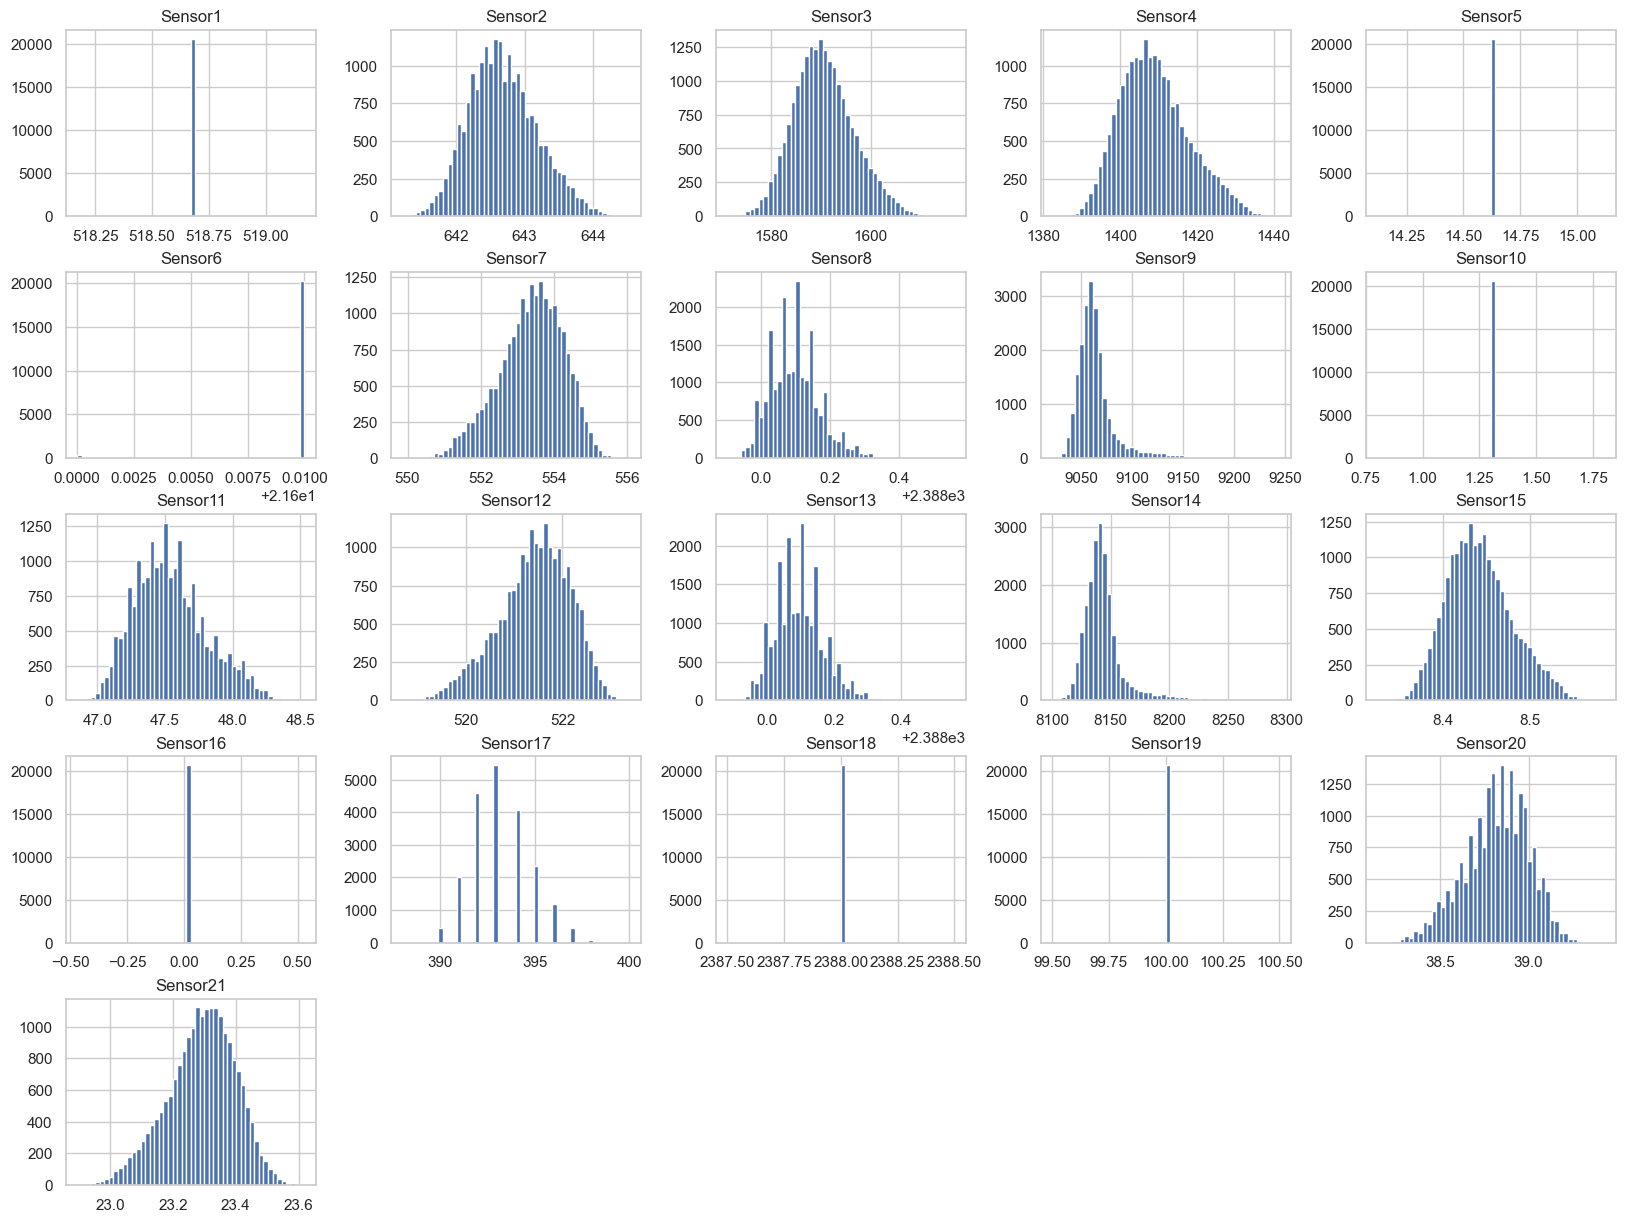

In [9]:
sensor_columns = [col for col in df_train.columns if 'Sensor' in col]

# Plot histograms for each sensor
df_train[sensor_columns].hist(figsize=(20, 15), bins=50)
plt.show()


In [10]:
constant_sensors = []
for sensor in sensor_columns:
    unique_values = df_train[sensor].nunique()
    if unique_values == 1:
        constant_sensors.append(sensor)
        print(f"{sensor} is constant with value {df_train[sensor].unique()[0]}")

print(f"Constant sensors: {constant_sensors}")


Sensor1 is constant with value 518.67
Sensor5 is constant with value 14.62
Sensor10 is constant with value 1.3
Sensor16 is constant with value 0.03
Sensor18 is constant with value 2388
Sensor19 is constant with value 100.0
Constant sensors: ['Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19']


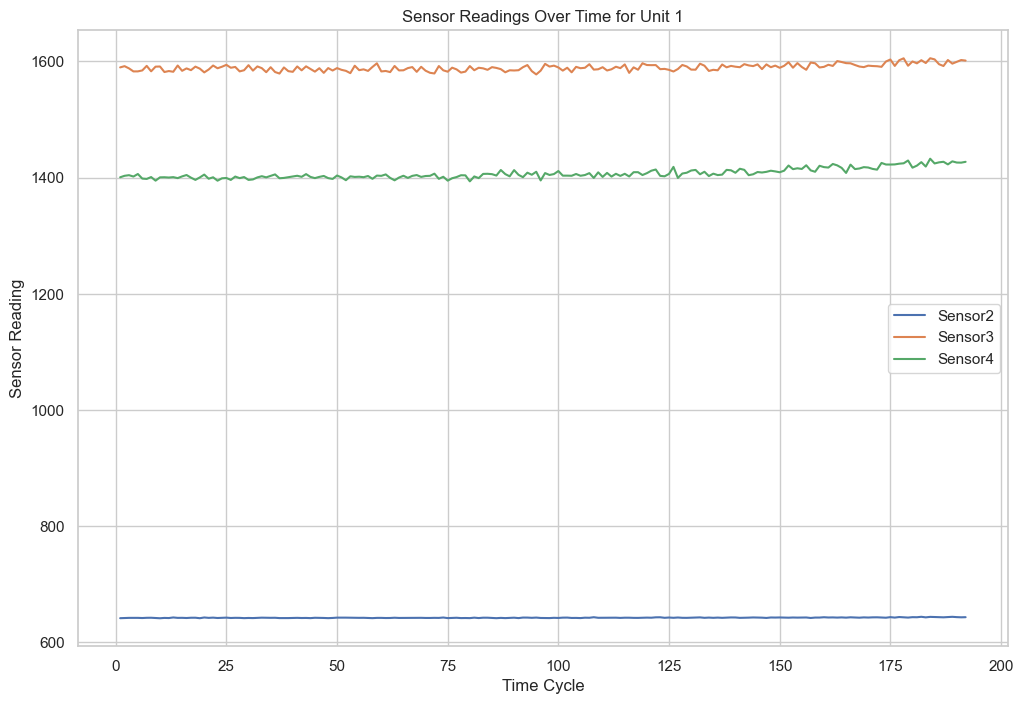

In [11]:
# Filter data for a single unit
unit_number = 1
df_unit = df_train[df_train['Unit'] == unit_number]

# Plot sensor readings
plt.figure(figsize=(12, 8))
for sensor in ['Sensor2', 'Sensor3', 'Sensor4']:
    plt.plot(df_unit['Time'], df_unit[sensor], label=sensor)

plt.xlabel('Time Cycle')
plt.ylabel('Sensor Reading')
plt.title(f'Sensor Readings Over Time for Unit {unit_number}')
plt.legend()
plt.show()


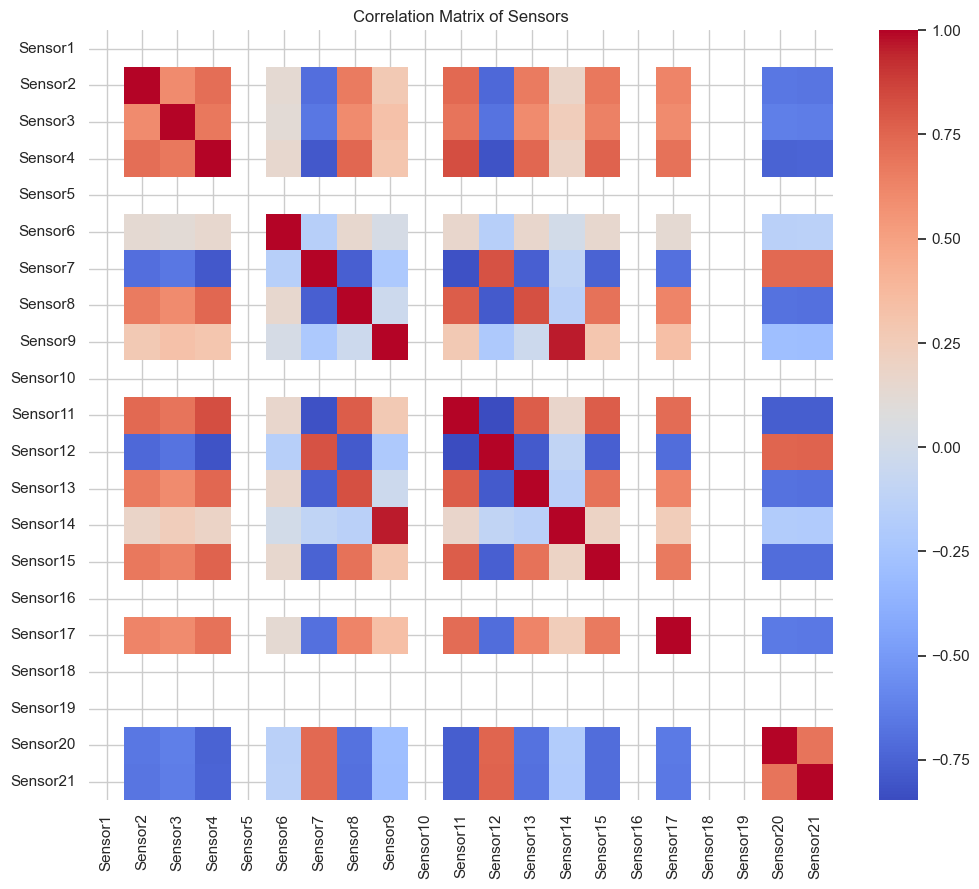

In [12]:
# Compute correlation matrix
corr_matrix = df_train[sensor_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Sensors')
plt.show()


In [13]:
# Threshold for considering high correlation
threshold = 0.95

# Find pairs of highly correlated sensors
high_corr_pairs = []
for i in range(len(sensor_columns)):
    for j in range(i+1, len(sensor_columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            sensor_pair = (sensor_columns[i], sensor_columns[j], corr_value)
            high_corr_pairs.append(sensor_pair)

print("Highly correlated sensor pairs:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation coefficient {pair[2]:.2f}")


Highly correlated sensor pairs:
Sensor9 and Sensor14 with correlation coefficient 0.96


In [14]:
settings = ['Setting1', 'Setting2', 'Setting3']
df_train[settings].describe()


,Setting1,Setting2,Setting3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


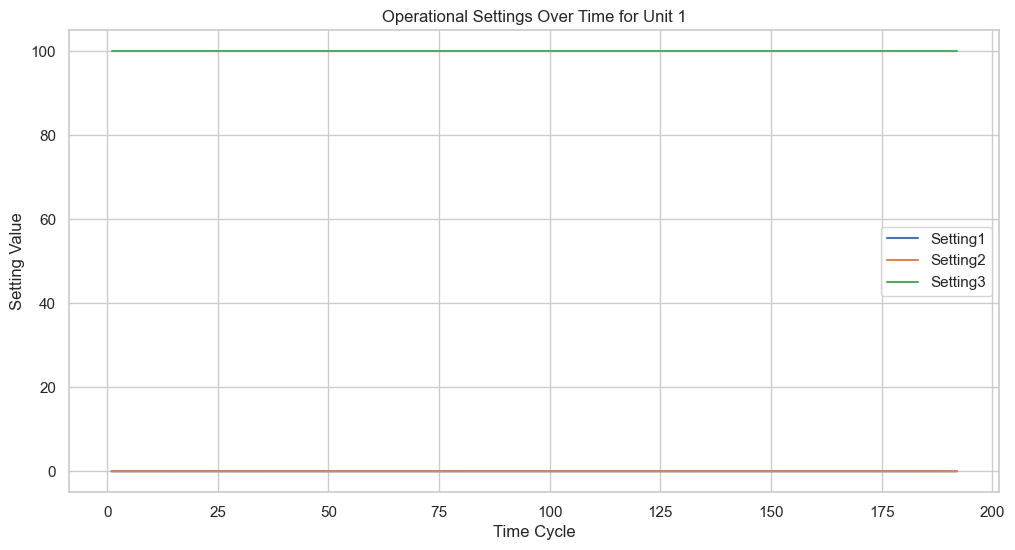

In [15]:
# Plot settings over time for a unit
plt.figure(figsize=(12, 6))
for setting in settings:
    plt.plot(df_unit['Time'], df_unit[setting], label=setting)

plt.xlabel('Time Cycle')
plt.ylabel('Setting Value')
plt.title(f'Operational Settings Over Time for Unit {unit_number}')
plt.legend()
plt.show()


In [16]:
def add_rul(df):
    max_cycles = df.groupby('Unit')['Time'].max().reset_index()
    max_cycles.columns = ['Unit', 'MaxTime']
    df = df.merge(max_cycles, on='Unit')
    df['RUL'] = df['MaxTime'] - df['Time']
    df.drop('MaxTime', axis=1, inplace=True)
    return df

df_train = add_rul(df_train)


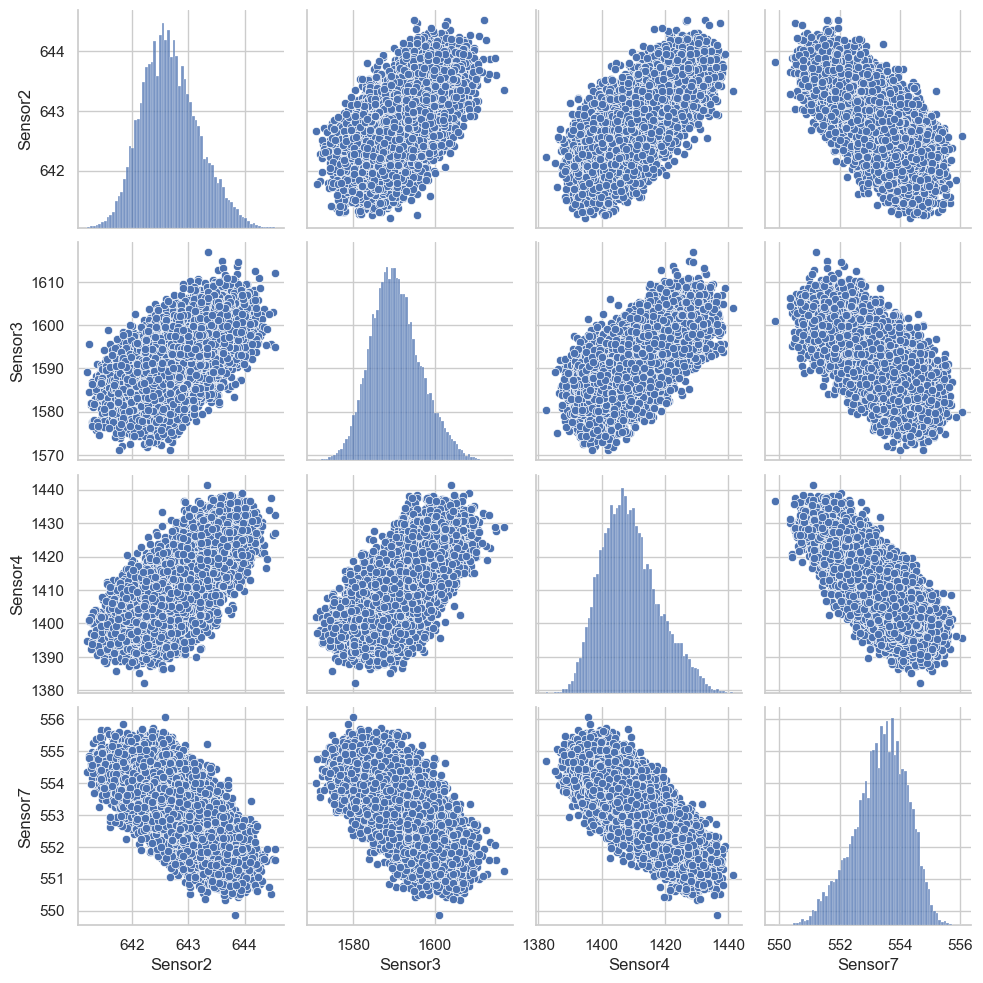

In [17]:
# Select a subset of sensors
subset_sensors = ['Sensor2', 'Sensor3', 'Sensor4', 'Sensor7']

sns.pairplot(df_train[subset_sensors])
plt.show()


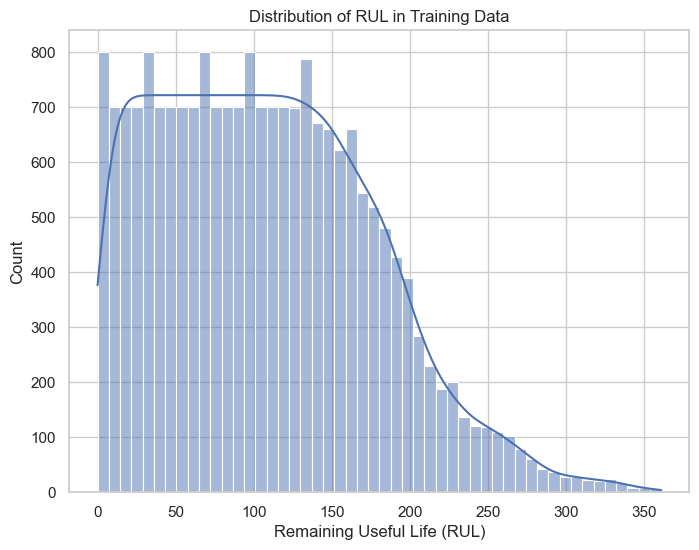

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(df_train['RUL'], bins=50, kde=True)
plt.xlabel('Remaining Useful Life (RUL)')
plt.title('Distribution of RUL in Training Data')
plt.show()


In [21]:
def add_rul(df):
    # Calculate Remaining Useful Life (RUL)
    max_cycles = df.groupby('Unit')['Time'].max().reset_index()
    max_cycles.columns = ['Unit', 'MaxTime']
    df = df.merge(max_cycles, on='Unit')
    df['RUL'] = df['MaxTime'] - df['Time']
    df.drop('MaxTime', axis=1, inplace=True)
    return df

# Apply the function to df_train
df_train = add_rul(df_train)


In [23]:
print(df_train.columns)

Index(['Unit', 'Time', 'Setting1', 'Setting2', 'Setting3', 'Sensor1',
       'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7',
       'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor13',
       'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19',
       'Sensor20', 'Sensor21', 'RUL'],
      dtype='object')


In [24]:
print(df_train.head())


   Unit  Time  Setting1  Setting2  Setting3  Sensor1  Sensor2  Sensor3  \
0     1     1   -0.0007   -0.0004     100.0   518.67   641.82  1589.70   
1     1     2    0.0019   -0.0003     100.0   518.67   642.15  1591.82   
2     1     3   -0.0043    0.0003     100.0   518.67   642.35  1587.99   
3     1     4    0.0007    0.0000     100.0   518.67   642.35  1582.79   
4     1     5   -0.0019   -0.0002     100.0   518.67   642.37  1582.85   

   Sensor4  Sensor5  ...  Sensor13  Sensor14  Sensor15  Sensor16  Sensor17  \
0  1400.60    14.62  ...   2388.02   8138.62    8.4195      0.03       392   
1  1403.14    14.62  ...   2388.07   8131.49    8.4318      0.03       392   
2  1404.20    14.62  ...   2388.03   8133.23    8.4178      0.03       390   
3  1401.87    14.62  ...   2388.08   8133.83    8.3682      0.03       392   
4  1406.22    14.62  ...   2388.04   8133.80    8.4294      0.03       393   

   Sensor18  Sensor19  Sensor20  Sensor21  RUL  
0      2388     100.0     39.06   23.

In [26]:
# Filter data for a single unit
unit_number = 1
df_unit = df_train[df_train['Unit'] == unit_number]


In [27]:
print(df_unit.columns)


Index(['Unit', 'Time', 'Setting1', 'Setting2', 'Setting3', 'Sensor1',
       'Sensor2', 'Sensor3', 'Sensor4', 'Sensor5', 'Sensor6', 'Sensor7',
       'Sensor8', 'Sensor9', 'Sensor10', 'Sensor11', 'Sensor12', 'Sensor13',
       'Sensor14', 'Sensor15', 'Sensor16', 'Sensor17', 'Sensor18', 'Sensor19',
       'Sensor20', 'Sensor21', 'RUL'],
      dtype='object')


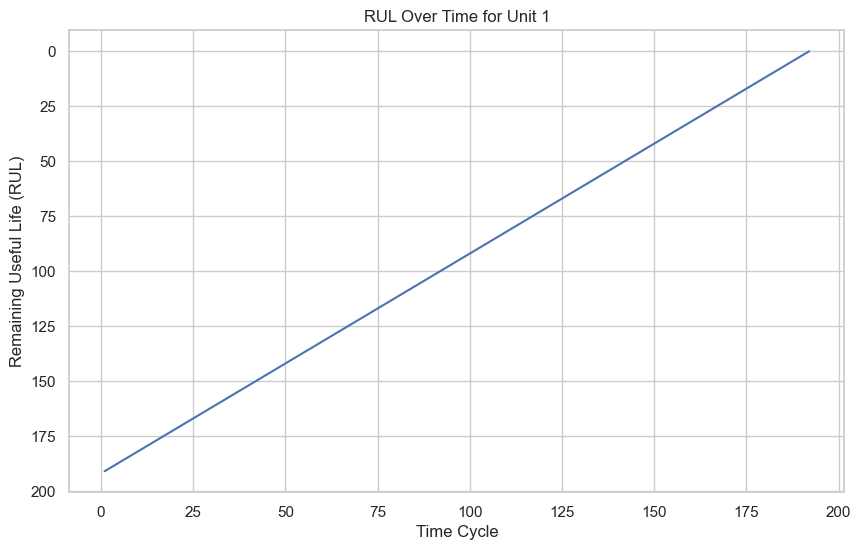

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df_unit['Time'], df_unit['RUL'])
plt.xlabel('Time Cycle')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title(f'RUL Over Time for Unit {unit_number}')
plt.gca().invert_yaxis()  # RUL decreases over time
plt.show()


In [29]:
# Drop unwanted columns
drop_columns = constant_sensors + ['Unit', 'Time']
df_model = df_train.drop(columns=drop_columns)

# Save to CSV
df_model.to_csv('../data/cleaned_data.csv', index=False)
